In [0]:
import numpy as np
import matplotlib.pyplot as plt

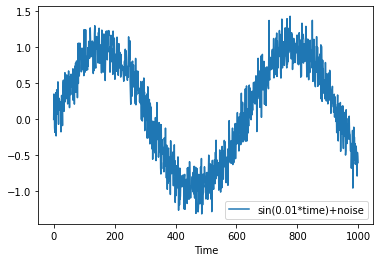

In [4]:
import torch
import torch.nn as nn
T = 1000
time = torch.arange(0.0, T)
X = torch.sin(0.01 * time) + 0.2 * torch.randn(T)
plt.plot(time.numpy(), X.numpy(), label="sin(0.01*time)+noise");
plt.legend();
plt.xlabel("Time");
plt.show()

In [0]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# Hyperparameter
batch_size, train_number = 16, 600

# timestamp
tau = 4
features = torch.zeros((T-tau, tau)) # AR Model needs tau inputs: shape is (996, 4)

for i in range(tau):
    features[:, i] = X[i:(T-tau + i)]
labels = X[tau:] # shape is (996, )

# Prepare DataLoader
train_data = TensorDataset(features[:train_number, :], labels[:train_number])
test_data = TensorDataset(features[train_number:, :], labels[train_number:])

In [0]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,output_size):
        super(RNN, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        hidden = self.initHidden(x.size(0))
        inputs = x.view(x.size(0), 1, -1) # (batch_size, seq_size, n_hidden)
        output, hidden = self.rnn(inputs, hidden)
        output = self.fc(output)

        return output
    
    def initHidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

In [0]:
num_epochs = 1000

In [0]:
data_iter = DataLoader(train_data, 16, shuffle=True)

In [0]:
rnn = RNN(4,10,1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [0]:
for epoch in range(num_epochs):
  running_loss = 0.0
  for x, y in data_iter:
    optimizer.zero_grad()
    output = rnn(x)
    loss = criterion(output.view(-1), y.view(-1))
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  if epoch % 10 == 0:
    print("Epoch:{} Loss :{}".format(epoch, loss))

In [0]:
rnn_estimate = rnn(features)

# RNN

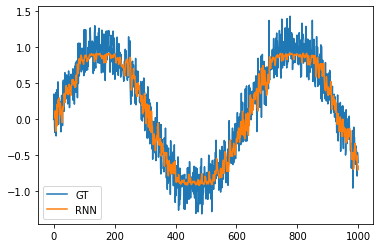

In [14]:
plt.plot(time.numpy(), X.numpy(), label='GT');
plt.plot(time[tau:].numpy(), rnn_estimate.reshape(-1,1).detach().numpy(), label='RNN');
plt.legend();

In [0]:
predictions = torch.zeros_like(rnn_estimate)
predictions[:(train_number - tau)] = rnn_estimate[:(train_number - tau)]

In [0]:
for i in range((train_number - tau), (T - tau)):
    predictions[i] = rnn(
        predictions[(i - tau):i].reshape(1, -1)
    ).reshape(1)

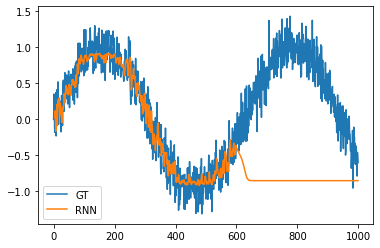

In [17]:
plt.plot(time.numpy(), X.numpy(), label='GT');
plt.plot(time[tau:].numpy(), predictions.reshape(-1,1).detach().numpy(), label='RNN');
plt.legend();

In [0]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,output_size):
        super(GRU, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers

        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        hidden = self.initHidden(x.size(0))
        inputs = x.view(x.size(0), 1, -1) # (batch_size, seq_size, n_hidden)
        output, hidden = self.gru(inputs, hidden)
        output = self.fc(output)

        return output
    
    def initHidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

In [0]:
gru = GRU(4,10,1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=0.01)

In [0]:
for epoch in range(num_epochs):
  running_loss = 0.0
  for x, y in data_iter:
    optimizer.zero_grad()
    output = gru(x)
    loss = criterion(output.view(-1), y.view(-1))
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  if epoch % 10 == 0:
    print("Epoch:{} Loss :{}".format(epoch, loss))

In [0]:
gru_estimate = gru(features)

# GRU

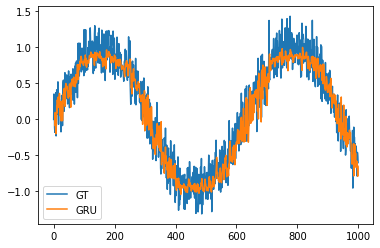

In [24]:
plt.plot(time.numpy(), X.numpy(), label='GT');
plt.plot(time[tau:].numpy(), gru_estimate.reshape(-1,1).detach().numpy(), label='GRU');
plt.legend();

In [0]:
predictions = torch.zeros_like(gru_estimate)
predictions[:(train_number - tau)] = gru_estimate[:(train_number - tau)]

In [0]:
for i in range((train_number - tau), (T - tau)):
    predictions[i] = gru(
        predictions[(i - tau):i].reshape(1, -1)
    ).reshape(1)

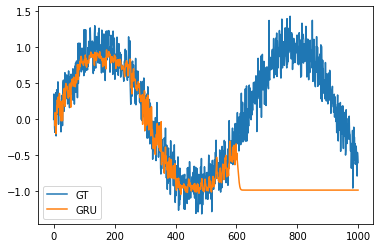

In [28]:
plt.plot(time.numpy(), X.numpy(), label='GT');
plt.plot(time[tau:].numpy(), predictions.reshape(-1,1).detach().numpy(), label='GRU');
plt.legend();